In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/real-or-fake-fake-jobposting-prediction/fake_job_postings.csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import warnings
warnings.simplefilter (action = 'ignore')
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# 1. Veri setini yükleme
df = pd.read_csv('/kaggle/input/real-or-fake-fake-jobposting-prediction/fake_job_postings.csv')
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
# Basic information about the dataset
print(df.info())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

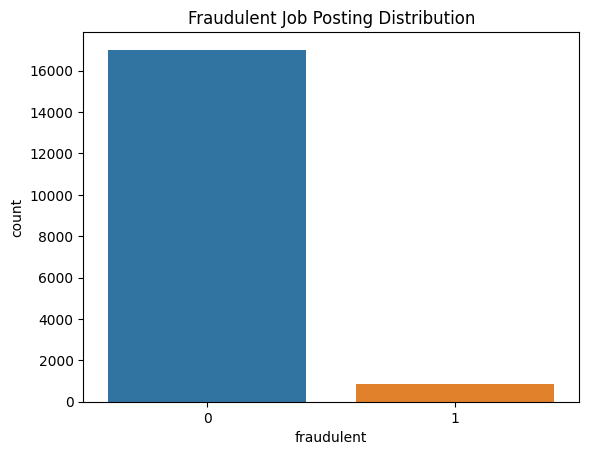

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Veri kümesi hakkında bilgi
df.info()

# Eksik verileri kontrol edin
df.isnull().sum()

# Sütunlardaki benzersiz değer sayıları
df.nunique()

# Hedef değişkenin (sahte iş ilanı mı değil mi) dağılımı
sns.countplot(x='fraudulent', data=df)
plt.title('Fraudulent Job Posting Distribution')
plt.show()

In [6]:
# Eksik satırları düşür
df.dropna(subset=['title', 'location', 'description'], inplace=True)

# Eksik verileri doldurmak için varsayılan bir değer kullanabilirsiniz
df['salary_range'].fillna('Not Provided', inplace=True)

In [7]:
# Etiket kodlama (Label Encoding) kullanarak kategorik değişkenleri dönüştür
label_encoder = LabelEncoder()
df['employment_type'] = label_encoder.fit_transform(df['employment_type'].astype(str))
df['required_experience'] = label_encoder.fit_transform(df['required_experience'].astype(str))
df['required_education'] = label_encoder.fit_transform(df['required_education'].astype(str))

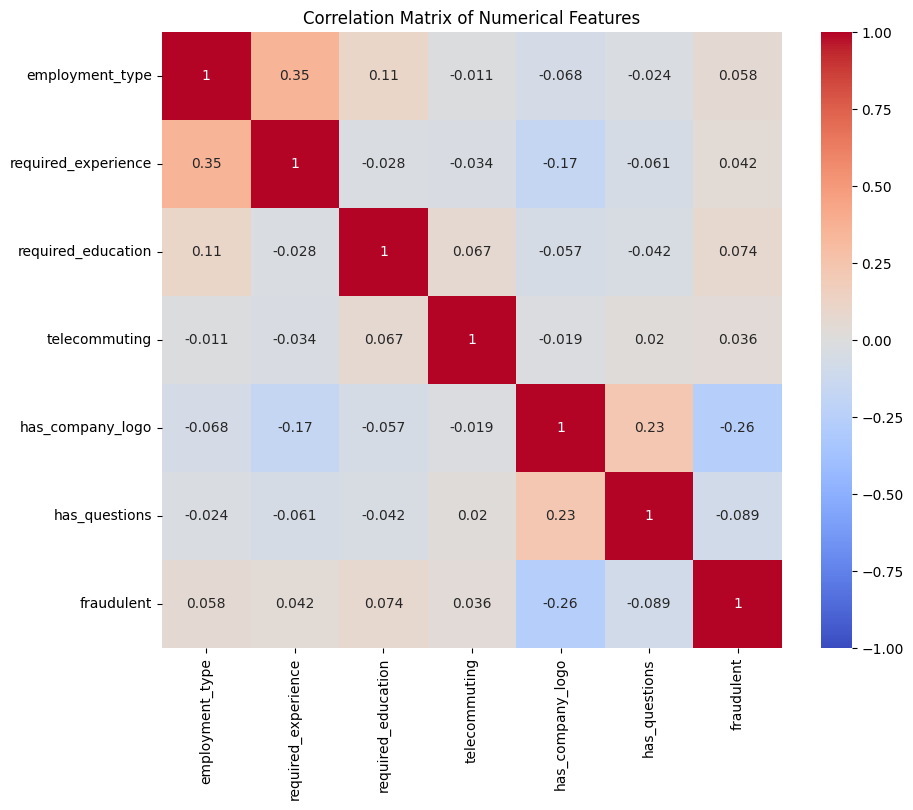

In [8]:
# Kategorik olan sütunları Label Encoding ile sayısal değerlere çeviriyoruz
categorical_cols = ['employment_type', 'required_experience', 'required_education', 'industry', 'function']

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# Sayısal sütunlar ve hedef değişkeni içeren korelasyon matrisi
corr_matrix = df[['employment_type', 'required_experience', 'required_education', 'telecommuting',
                  'has_company_logo', 'has_questions', 'fraudulent']].corr()

# Korelasyon matrisini çizelim
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

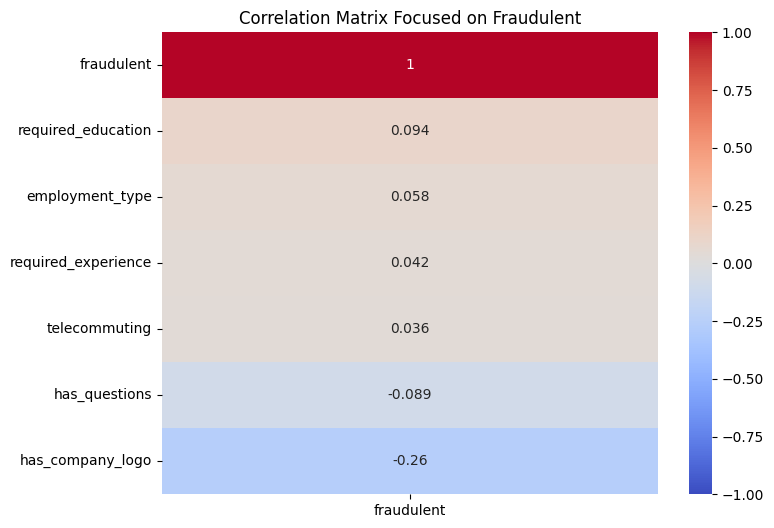

In [9]:
# Kategorik olan sütunları Label Encoding ile sayısal değerlere çeviriyoruz
categorical_cols = ['employment_type', 'required_experience', 'required_education', 'industry', 'function']

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# Sayısal sütunlar ve hedef değişkeni içeren korelasyon matrisi
corr_matrix = df[['employment_type', 'required_experience', 'required_education', 'telecommuting',
                  'has_company_logo', 'has_questions', 'fraudulent']].corr()

# Fraudulent ile en yüksek korelasyona sahip olan sütunlar
fraudulent_corr = corr_matrix['fraudulent'].sort_values(ascending=False)

# Korelasyon matrisini çizelim
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix[['fraudulent']].sort_values(by='fraudulent', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Focused on Fraudulent')
plt.show()

In [10]:
# İş tanımını TF-IDF vektörleştirme ile dönüştürelim
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_text = tfidf.fit_transform(df['description']).toarray()

In [11]:
# Diğer özellikleri ekleyelim
X = np.hstack((X_text, df[['employment_type', 'required_experience', 'required_education']].values))

# Hedef değişken
y = df['fraudulent']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Modeli oluştur ve eğit ilk random forest ikinci logreg
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.9769033361847733

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3324
           1       0.98      0.57      0.72       183

    accuracy                           0.98      3507
   macro avg       0.98      0.78      0.85      3507
weighted avg       0.98      0.98      0.97      3507



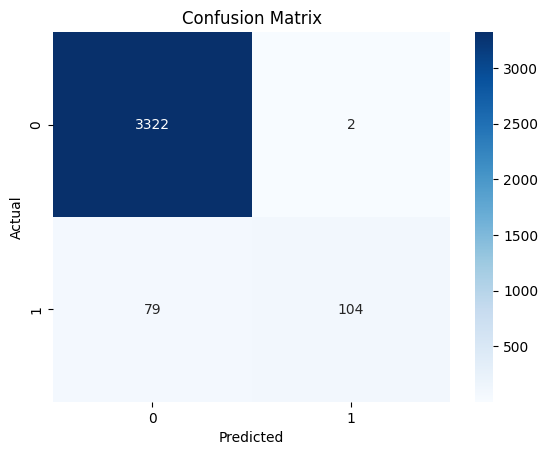

In [14]:
# Test seti üzerinde tahmin yap
y_pred = model.predict(X_test)

# Sonuçları değerlendirin
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [15]:
# logreg
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [17]:
# Test verisi ile tahmin yapma
y_pred = model.predict(X_test)

# Sonuçları değerlendirme
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
#İki algoritma da güzel çalıştı ilkinde yüzde 98 ikincisinde yüzde 97 accuracy aldım şimdi k-means unsupervised algoritmasına bakalım

Accuracy: 0.9657827202737382
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3324
           1       1.00      0.34      0.51       183

    accuracy                           0.97      3507
   macro avg       0.98      0.67      0.75      3507
weighted avg       0.97      0.97      0.96      3507

Confusion Matrix:
[[3324    0]
 [ 120   63]]


#İki algoritma da güzel çalıştı ilkinde yüzde 98 ikincisinde yüzde 97 accuracy aldım şimdi k-means unsupervised algoritmasına bakalım

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.simplefilter(action='ignore')

Yukarıdan tekrar bir kod aldım vektörizasyon işlemini yapıyor emin olmak istedim.

In [19]:
# İş tanımını TF-IDF vektörleştirme ile dönüştürelim
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_text = tfidf.fit_transform(df['description']).toarray()

In [20]:
# Diğer özellikleri ekleyelim
X = np.hstack((X_text, df[['employment_type', 'required_experience', 'required_education']].values))


In [21]:
# K-Means algoritmasını uygulama
kmeans = KMeans(n_clusters=2, random_state=42)  # 2 küme olmalı çünkü fraudulent olan ve olmayanları ayırmak istiyoruz
kmeans.fit(X)

KMeans(n_clusters=2, random_state=42)

In [22]:
# Tahmin edilen kümeler
df['cluster'] = kmeans.labels_

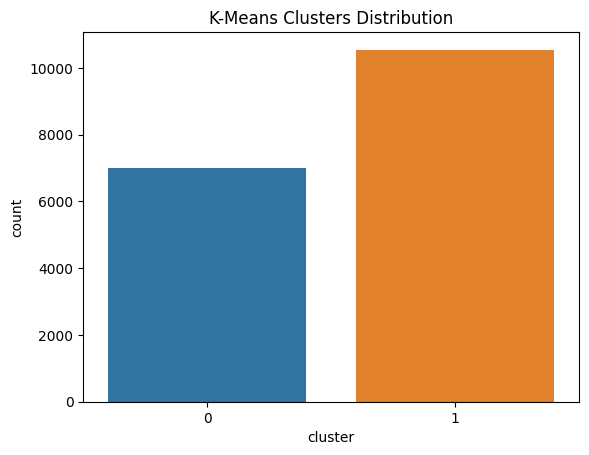

In [23]:
# Kümelerin sayısını görelim
sns.countplot(x='cluster', data=df)
plt.title('K-Means Clusters Distribution')
plt.show()

In [24]:
# Silhouette Skoru ile modelin performansını ölçelim
silhouette_avg = silhouette_score(X, df['cluster'])
print(f"Silhouette Score for K-Means: {silhouette_avg}")

Silhouette Score for K-Means: 0.5207664787404048


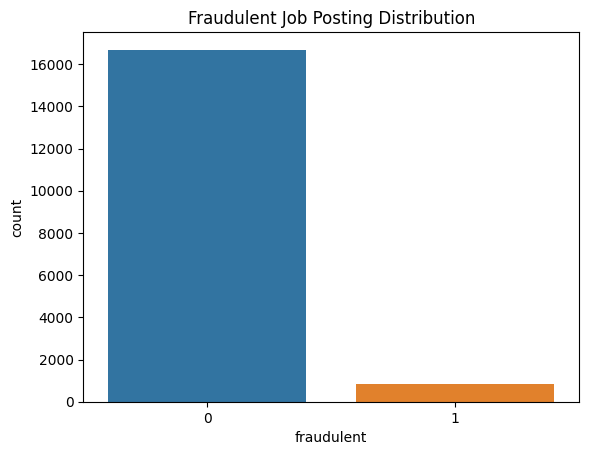

In [25]:
# Test setinde performansı karşılaştırmak için Fraudulent'e göre dağılımı görelim
sns.countplot(x='fraudulent', data=df)
plt.title('Fraudulent Job Posting Distribution')
plt.show()

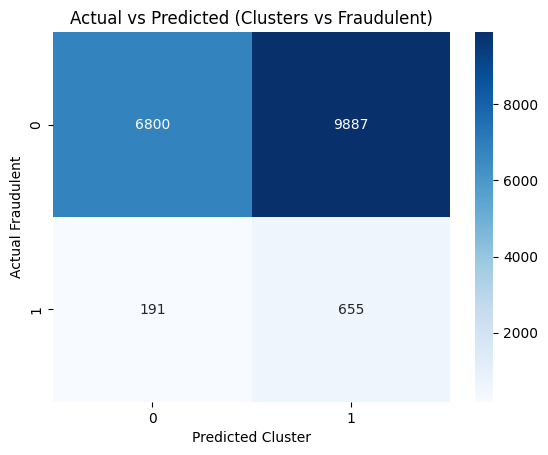

In [26]:
# Gerçek fraud değerleri ile kümelenen değerleri karşılaştıralım
cross_tab = pd.crosstab(df['fraudulent'], df['cluster'], rownames=['Actual Fraudulent'], colnames=['Predicted Cluster'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('Actual vs Predicted (Clusters vs Fraudulent)')
plt.show()

Bu algoritmadan düşük bir silüet skoru değeri aldığım için 2 küme olayından kurtulup tekrar deneyeceğim.Yukarıdaki grafikte de görüldüğü gibi false positive bir dağılım mevcut.

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Veriyi standardize etme (ölçekleme)
scaler = StandardScaler()
# Diğer özellikleri ekleyelim
X = np.hstack((X_text, df[['employment_type', 'required_experience', 'required_education']].values))

X_scaled = scaler.fit_transform(X)

# Farklı küme sayıları ile K-Means denemesi yapalım
for n_clusters in range(2, 10):  # 2 ile 10 arasında küme sayısı deniyoruz
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    # Silhouette skoru hesapla
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"Number of Clusters: {n_clusters}, Silhouette Score: {silhouette_avg}")

Number of Clusters: 2, Silhouette Score: 0.16064194284347874
Number of Clusters: 3, Silhouette Score: 0.09936382556272698
Number of Clusters: 4, Silhouette Score: -0.18460249219302305
Number of Clusters: 5, Silhouette Score: -0.023951085371987205
Number of Clusters: 6, Silhouette Score: -0.021772839564725293
Number of Clusters: 7, Silhouette Score: -0.18020131460479058
Number of Clusters: 8, Silhouette Score: -0.022812671957351868
Number of Clusters: 9, Silhouette Score: -0.07384364928428155


Birde 3 küme ile aynı kodları deneyeceğim belki daha iyi bir değer alırım.3 kümeden sonra zaten eksili değerlere düşerek kümelerin kötüleştiğini gösterdi

Silhouette Score with 3 clusters: 0.09936382556272698


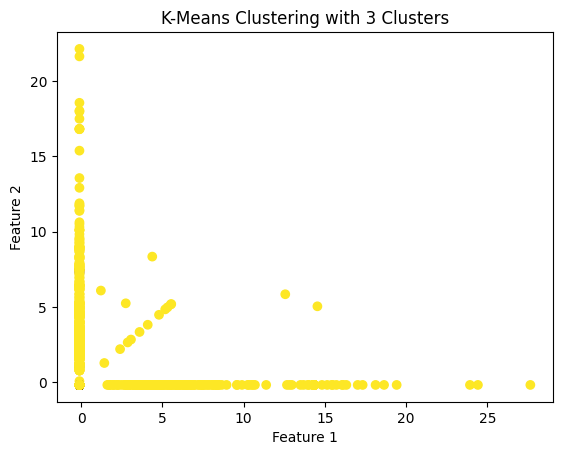

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Veriyi standardize etme (ölçekleme)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans algoritmasını 3 kümeli olarak tanımla
kmeans_3_clusters = KMeans(n_clusters=3, random_state=42)
cluster_labels_3 = kmeans_3_clusters.fit_predict(X_scaled)

# Silhouette skoru hesapla
silhouette_avg_3 = silhouette_score(X_scaled, cluster_labels_3)
print(f"Silhouette Score with 3 clusters: {silhouette_avg_3}")

# Kümeleri görselleştirelim (ilk iki ana bileşen üzerinden)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels_3, cmap='viridis')
plt.title("K-Means Clustering with 3 Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


Daha kötü bir değer aldım o yüzden yüzde 52 yi kalbul edip bu defteri sonlandırıyorum.

I used 3 algorithms. The first one was random forest classifier, I got 98 percent accuracy, the second one was logistic regression, I got 97 percent accuracy from that. I used k-means as the unsupervised algorithm, I didn't use the elbow method because I was trying to do a classification and so I thought I needed 2 clusters, as a result I was able to get a silhouette score of 52 percent. If a different categorical column is added to eliminate false positives, it is possible to get much higher values in this dataset.